In [6]:
######################################################################################
# Python for Finance, 2nd ed., Hilpisch, Yves
# Chapter 8 - Financial Time Series: Rolling Statistics
#             a.k.a. financial indicators or financial studies
#
# Figure 8-5 Rolling statistics for minimum, mean, maximum values
# Figure 8-6 Apple stock price and two simple moving averages
# Figure 8-7 Apple stock price, two simple moving averages and positions
#
# https://stooq.com/db/h/
# https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python
# Python 3, Jupyter Lab
######################################################################################

%matplotlib inline
import numpy as np
import pandas as pd
from pylab import mpl, plt

plt.style.use('seaborn')
mpl.rcParams['font.family']='serif'

data=pd.read_csv('./data_all.csv', index_col=0, parse_dates=True)

data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5904 entries, 1997-05-16 to 2020-11-05
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   amzn.us.txt  5904 non-null   float64
 1   msft.us.txt  5903 non-null   float64
 2   aapl.us.txt  5902 non-null   float64
 3   intc.us.txt  5904 non-null   float64
 4   gs_n.us.txt  1184 non-null   float64
 5   spy.us.txt   3952 non-null   float64
 6   ivv.us.txt   3952 non-null   float64
 7   vxx.us.txt   705 non-null    float64
 8   eu.c.txt     5900 non-null   float64
 9   xauusd.txt   5870 non-null   float64
 10  gdx.us.txt   3641 non-null   float64
 11  gld.us.txt   3952 non-null   float64
dtypes: float64(12)
memory usage: 599.6 KB


In [30]:
sym = 'aapl.us.txt'
data1 = pd.DataFrame(data[sym].dropna())
data1.tail()

,aapl.us.txt
<DATE>,
2020-10-30,108.86
2020-11-02,108.77
2020-11-03,110.44
2020-11-04,114.95
2020-11-05,119.03


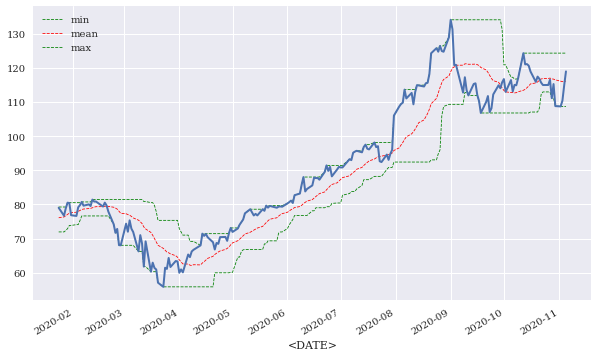

In [31]:
window = 20
data1['min'] = data1[sym].rolling(window=window).min()
data1['mean'] = data1[sym].rolling(window=window).mean()
data1['std'] = data1[sym].rolling(window=window).std()
data1['median'] = data1[sym].rolling(window=window).median()
data1['max'] = data1[sym].rolling(window=window).max()
data1['ewma'] = data1[sym].ewm(halflife=0.5, min_periods=window).mean()

data1.dropna().head()

ax = data1[['min', 'mean', 'max']].iloc[-200:].plot(figsize=(10,6), style=['g--','r--','g--'], lw = 0.8)
data1[sym].iloc[-200:].plot(ax=ax, lw=2.0)

In [12]:
data1['SMA_short'] = data[sym].rolling(window=42).mean()
data1['SMA_long'] = data[sym].rolling(window=252).mean()
data1[[sym, 'SMA_short', 'SMA_long']].tail()

,aapl.us.txt,SMA_short,SMA_long
<DATE>,,,
2020-10-30,108.86,115.346071,86.060226
2020-11-02,108.77,114.807262,86.240563
2020-11-03,110.44,114.558690,86.425873
2020-11-04,114.95,114.415595,86.629444
2020-11-05,119.03,114.563452,86.849095


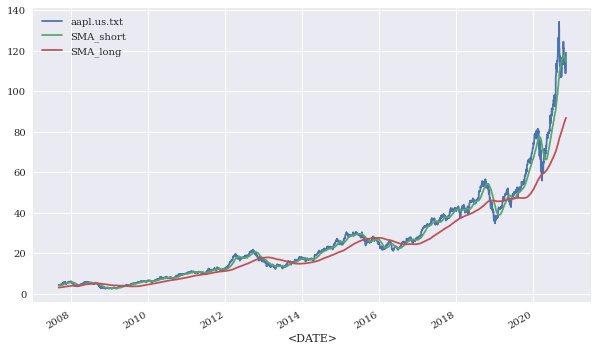

In [17]:
data1[[sym, 'SMA_short', 'SMA_long']].loc['2007-09':'2020'].plot(figsize=(10,6));

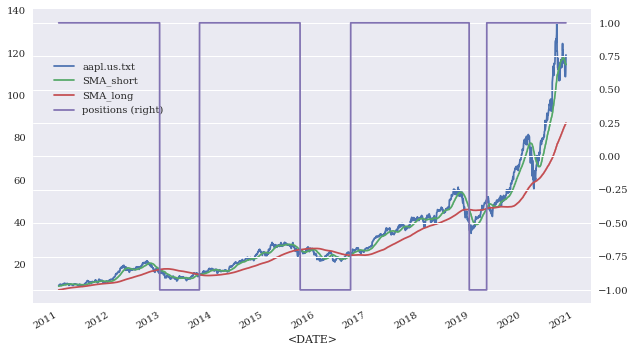

In [29]:
data1.dropna(inplace=True)

#data1.insert(3, 'positions', "")

data1['positions'] = np.where(data1['SMA_short'] > data1['SMA_long'], 1, -1)

ax = data1[[sym, 'SMA_short', 'SMA_long', 'positions']].loc['2011':'2020'].plot(figsize=(10,6), \
                                                                                   secondary_y='positions')

ax.get_legend().set_bbox_to_anchor((0.25, 0.85));